# 1. data

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [3]:
# pip install scikit-learn-extra

In [4]:
metadata=pd.read_csv("wine-clustering.csv")
metadata.head(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290  
7   3.58     1295  
8   2.85     1045  
9   3.55     1045

In [5]:
metadata.shape

(178, 13)

In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
metadata.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

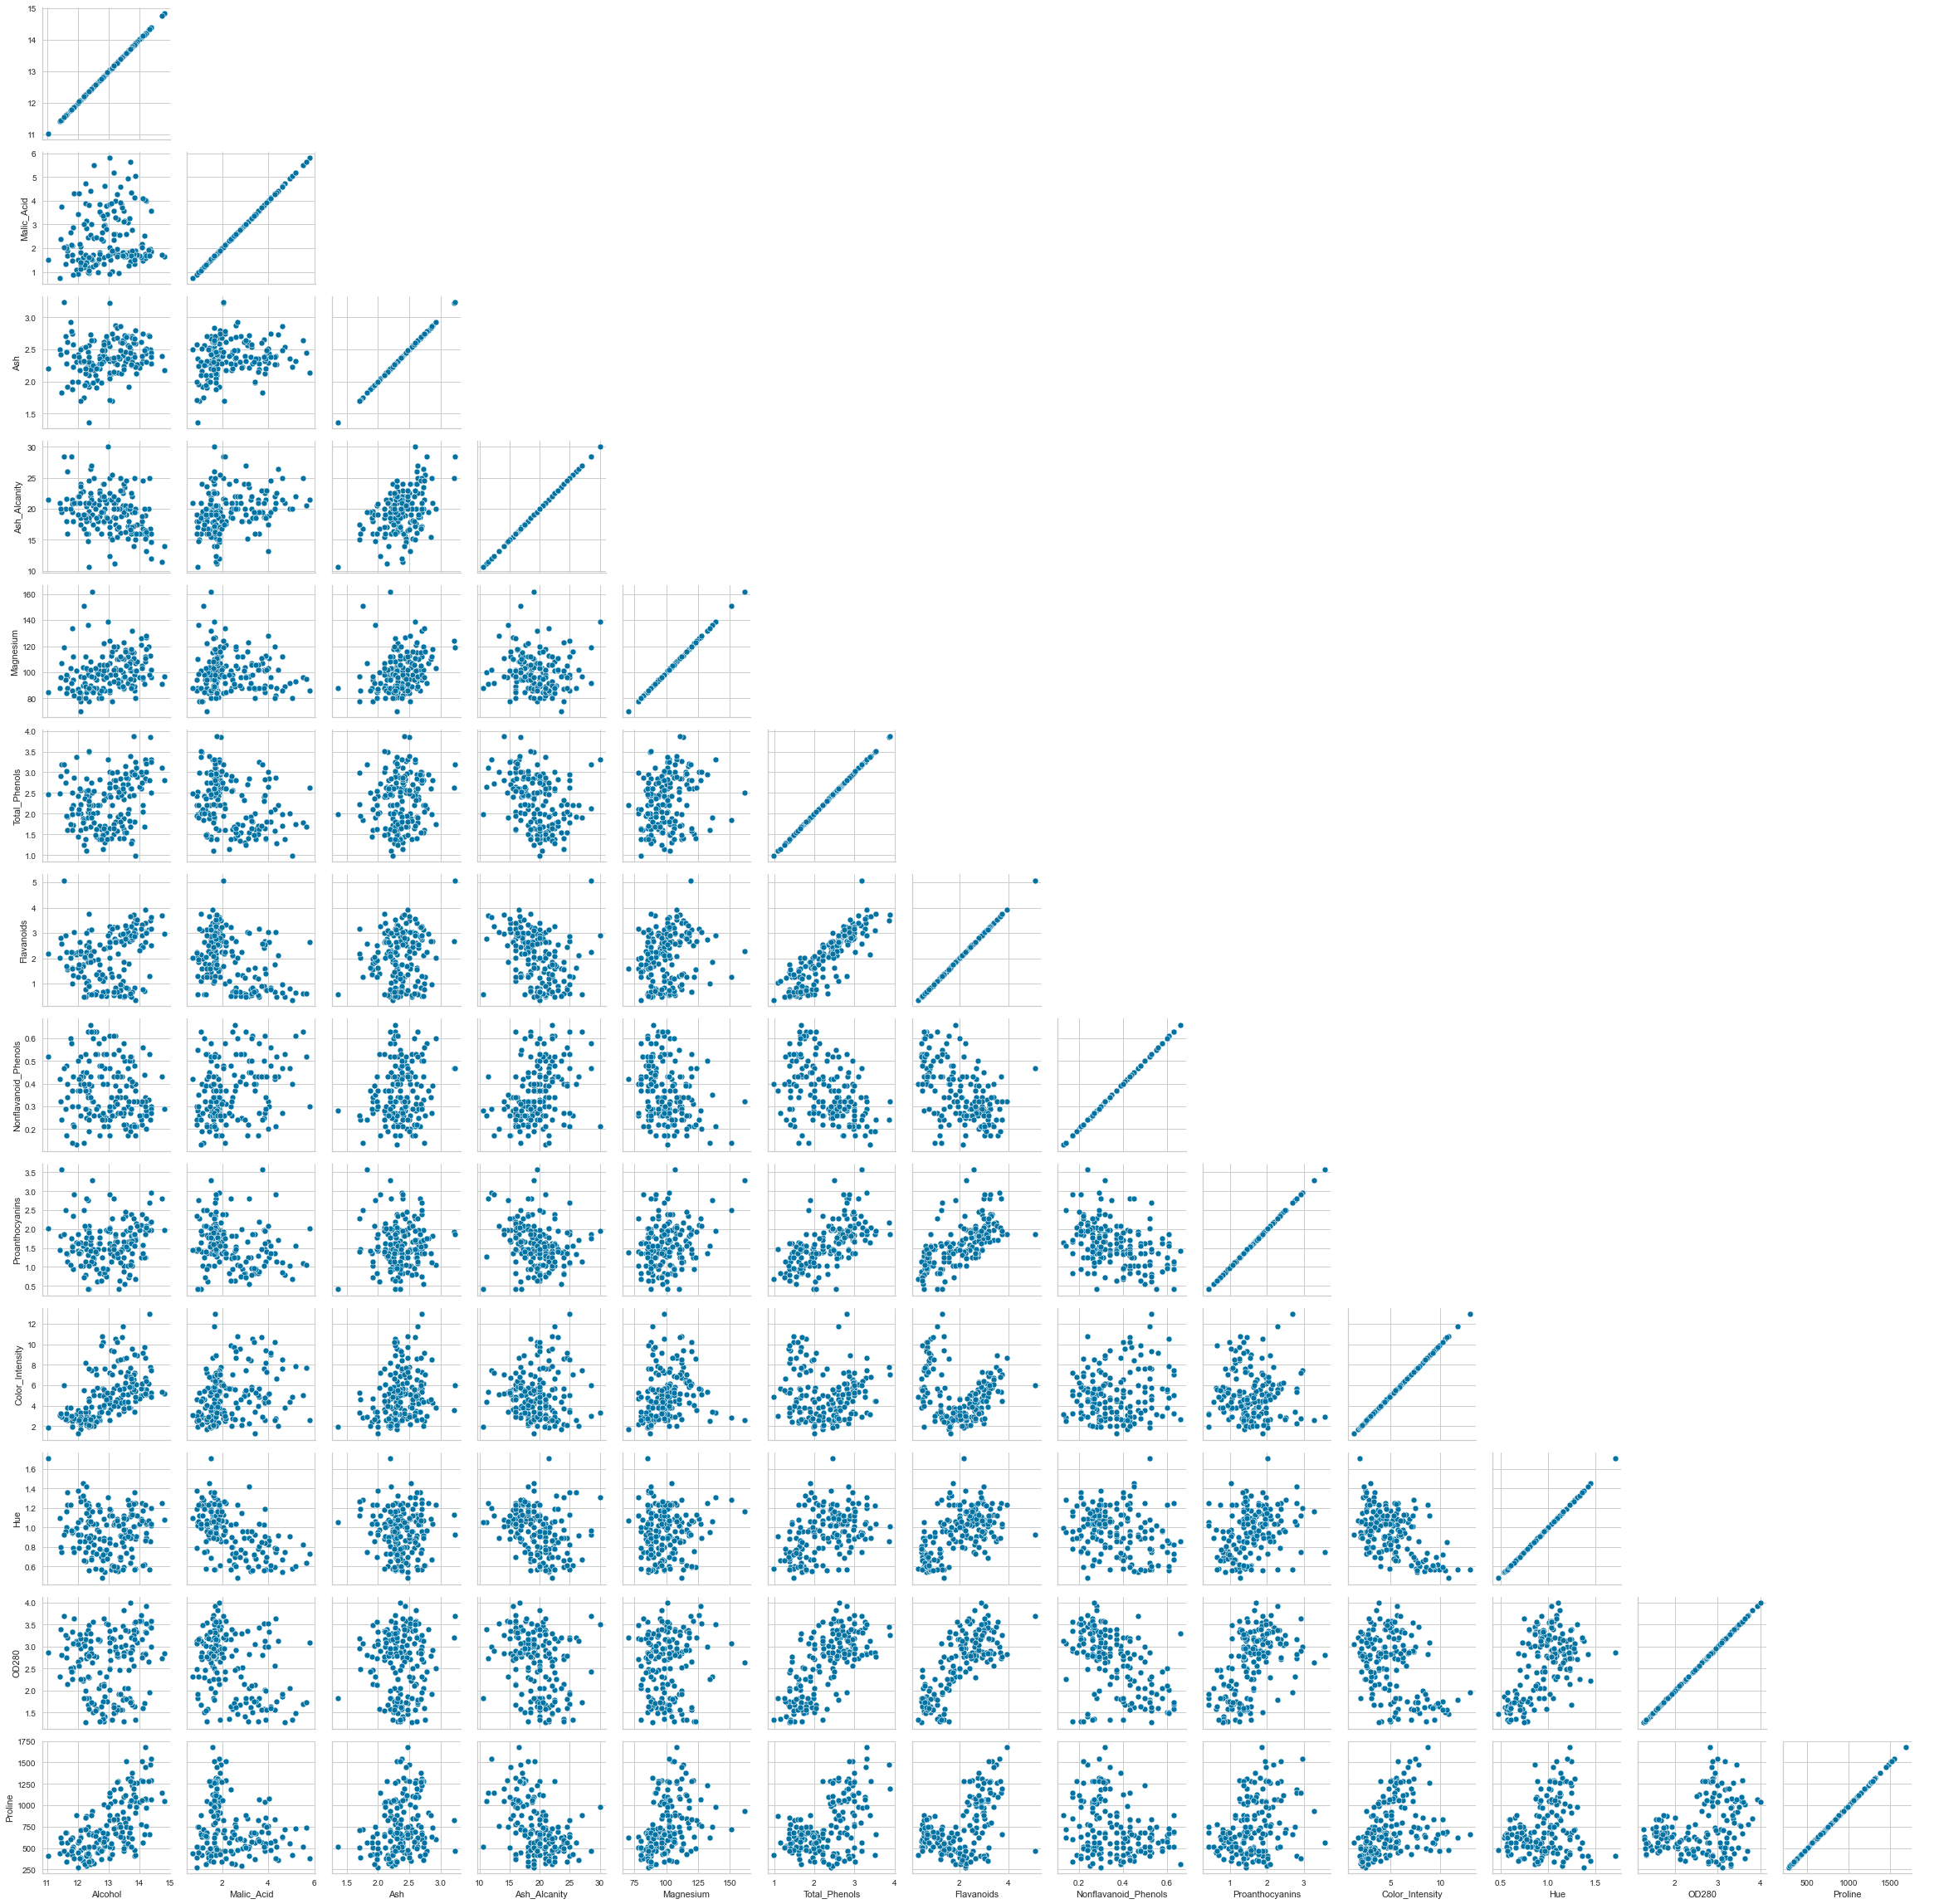

In [8]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

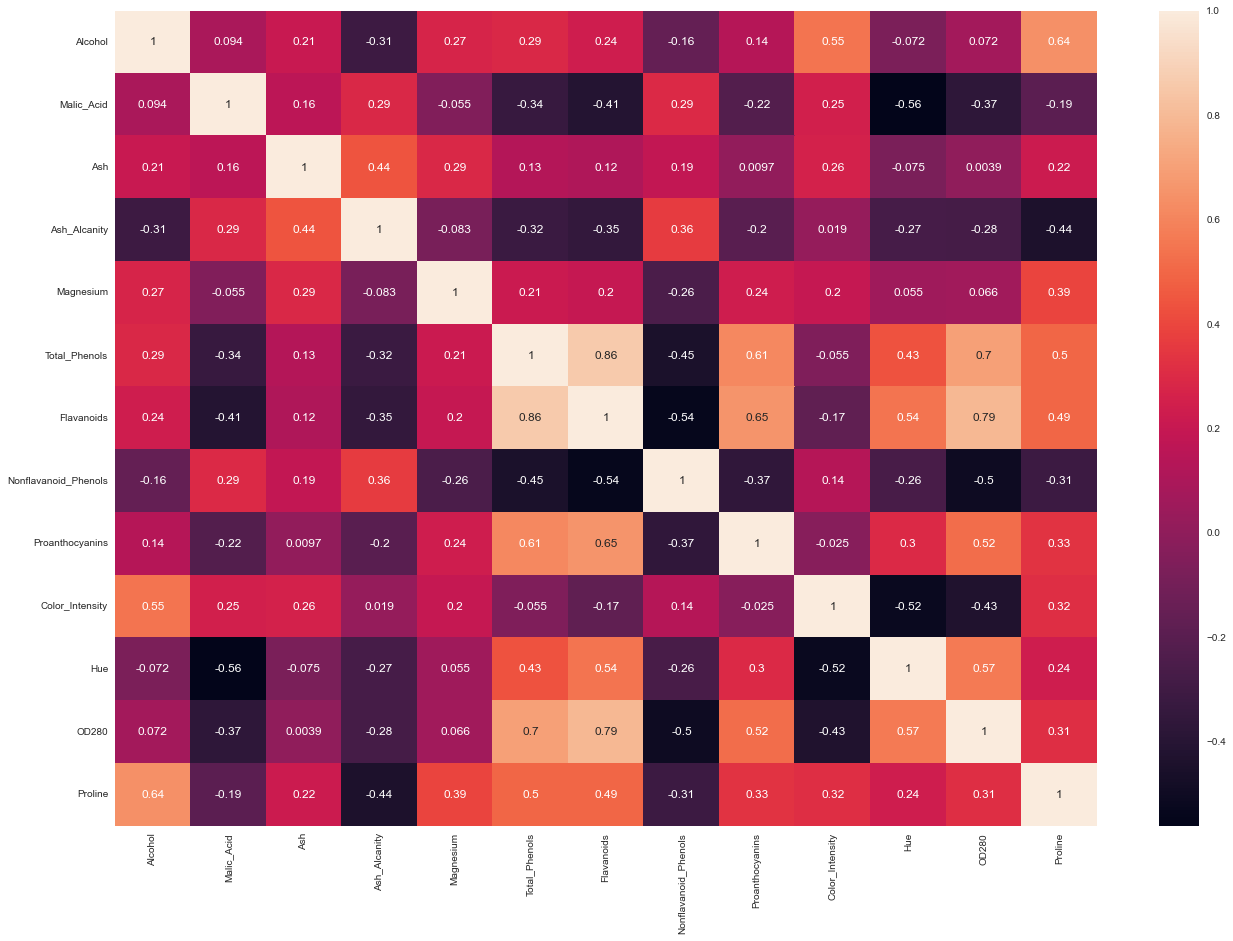

In [9]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(metadata.corr(), annot=True)
plt.show()

# 2. KMeans

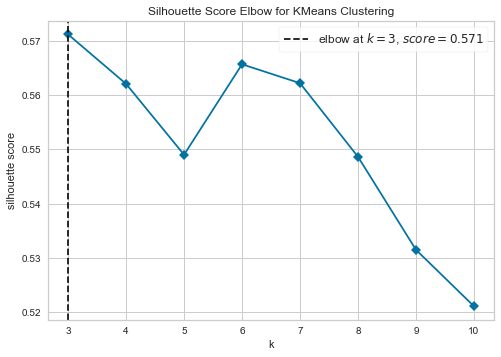

In [10]:
kmeans = KMeans()
kviz = KElbowVisualizer(kmeans, k=(3,11), metric='silhouette', timings=False)
kviz.fit(metadata)
kviz.show()
plt.show()

In [11]:
#Train the Model
kmeans = KMeans(n_clusters=3).fit(metadata)
metadata['cluster'] = kmeans.labels_

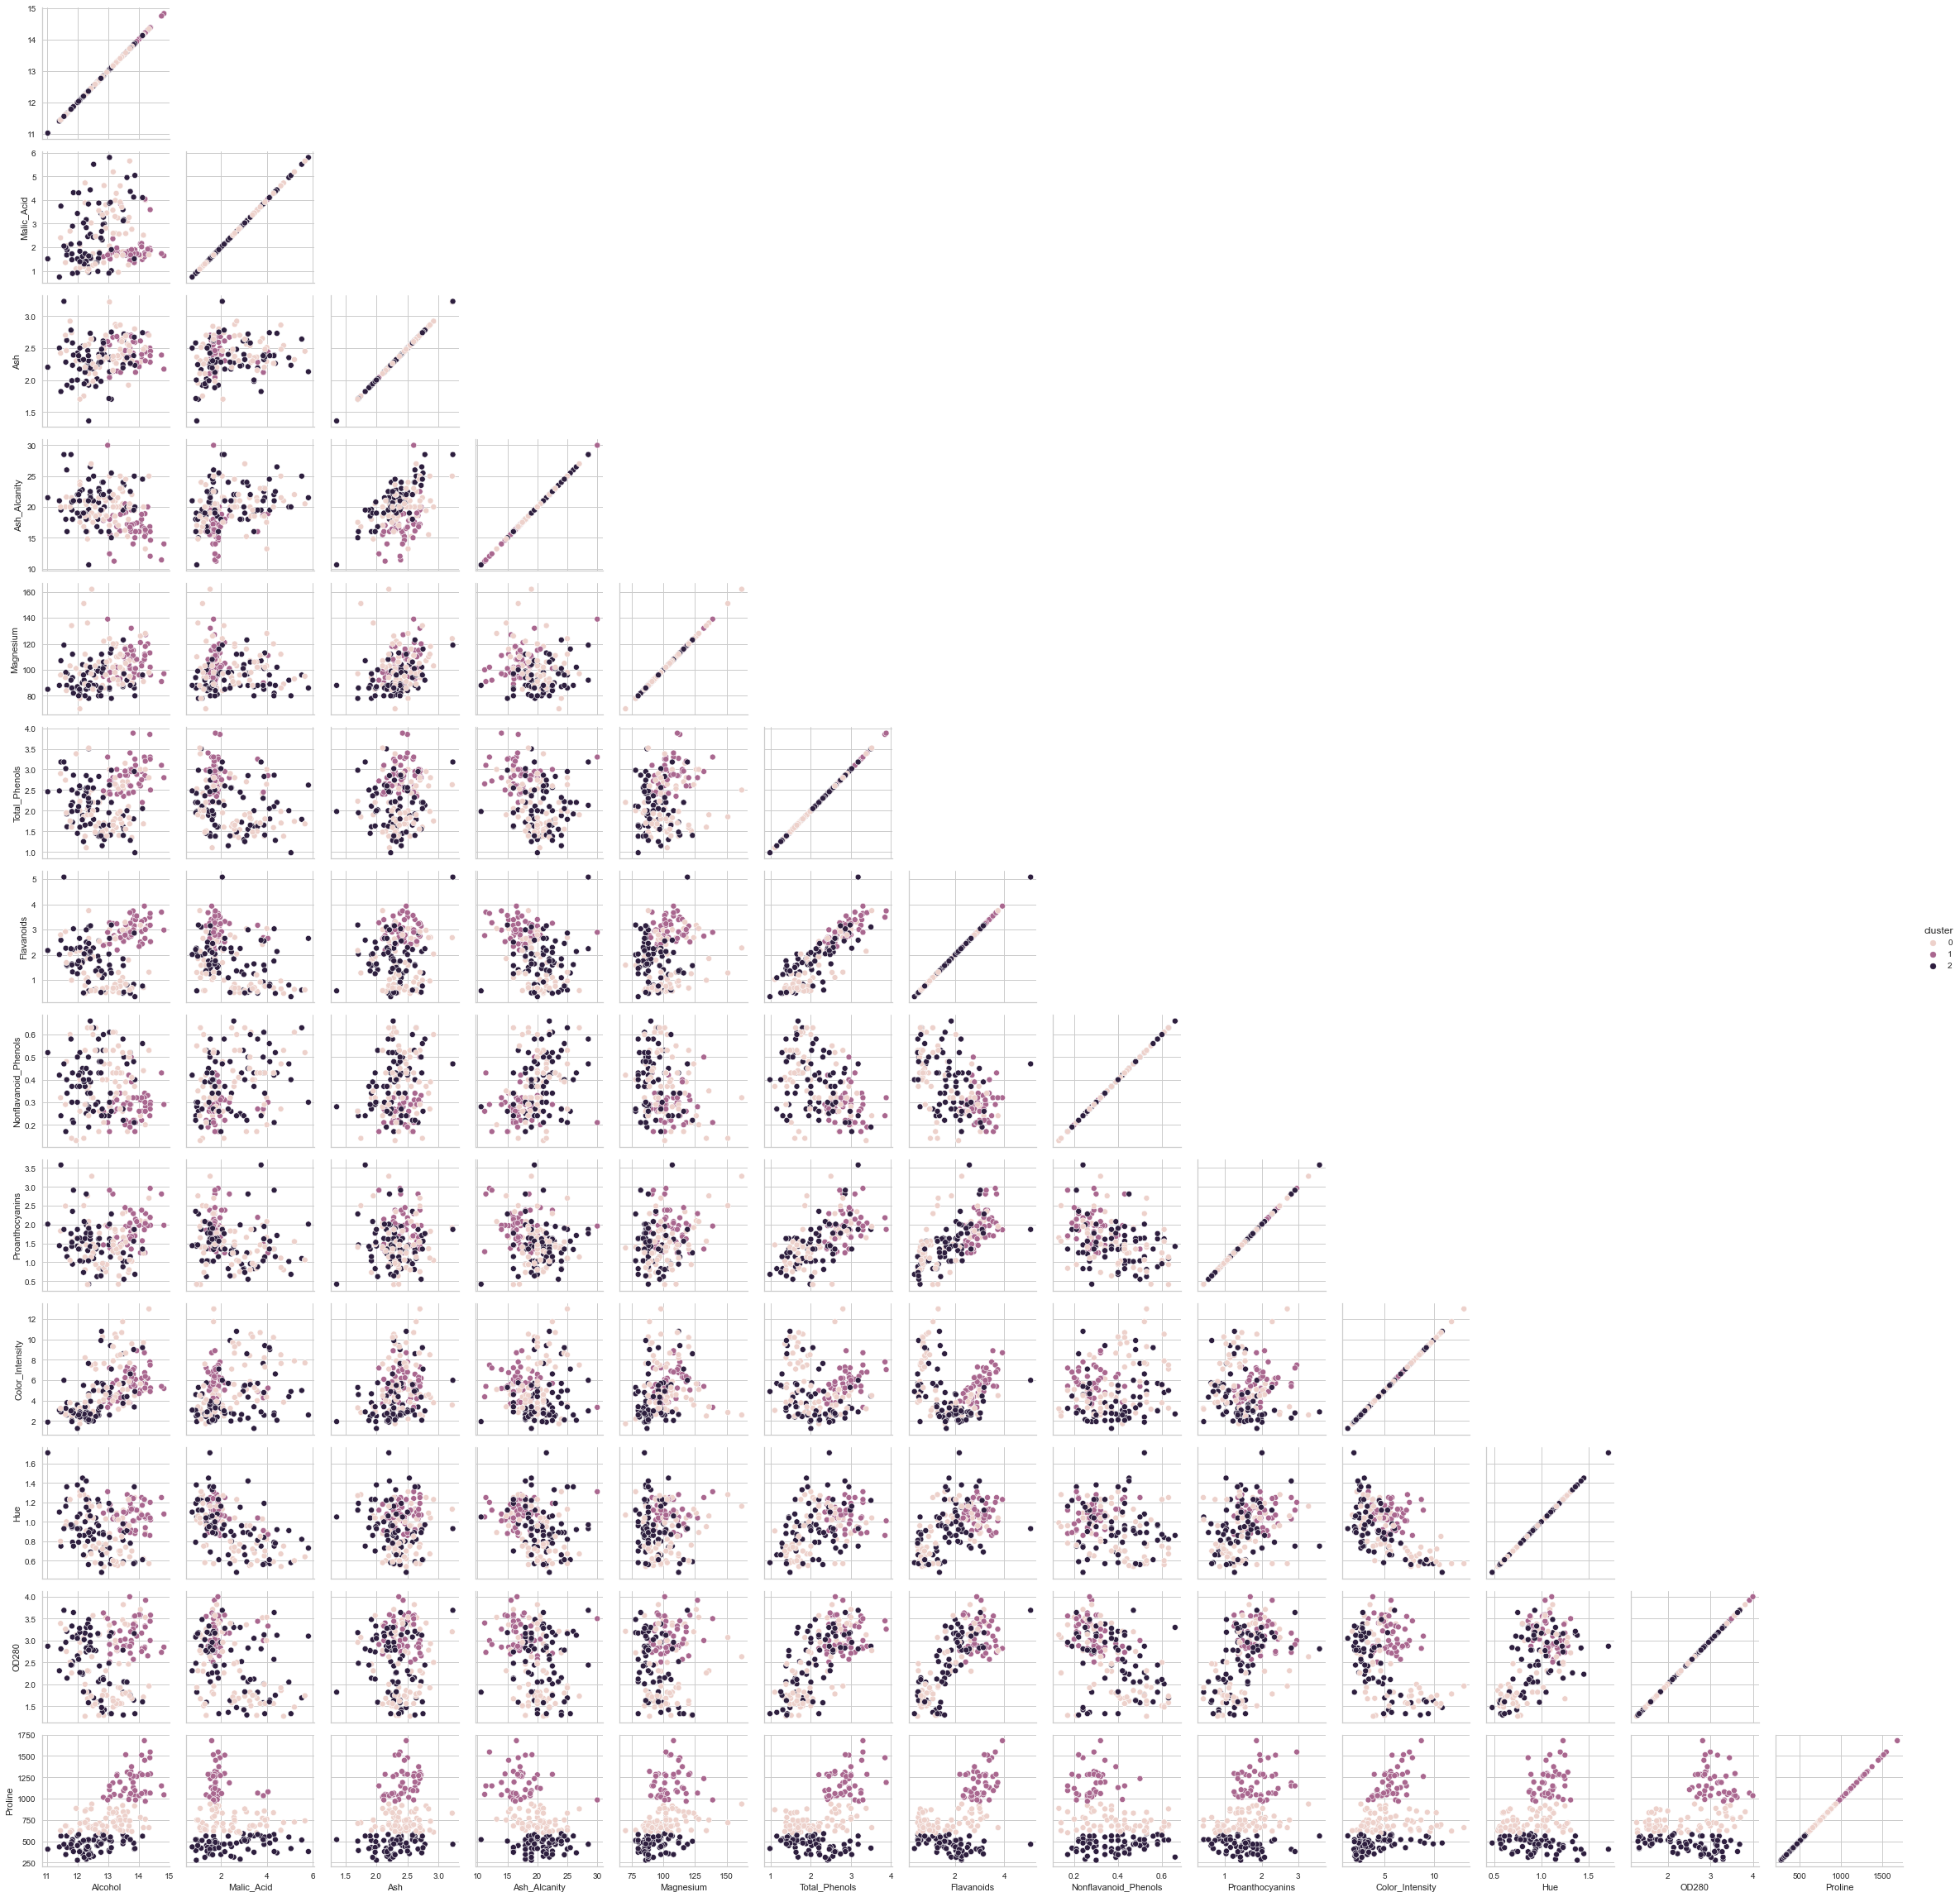

In [12]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [13]:
kmeans.inertia_

2370689.686782968

查看各cluster的中心，並在圖上畫出

In [14]:
kmeans.cluster_centers_

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [15]:
all=metadata.copy()
all.insert(0, 'count', len(all.index))
all=all.mean(axis=0)
all

count                   178.000000
Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
cluster                   1.039326
dtype: float64

In [16]:
cluster0=metadata[metadata['cluster']==0]
cluster0.insert(0, 'count', len(cluster0.index))
cluster0=cluster0.mean(axis=0)
cluster0

count                    62.000000
Alcohol                  12.929839
Malic_Acid                2.504032
Ash                       2.408065
Ash_Alcanity             19.890323
Magnesium               103.596774
Total_Phenols             2.111129
Flavanoids                1.584032
Nonflavanoid_Phenols      0.388387
Proanthocyanins           1.503387
Color_Intensity           5.650323
Hue                       0.883968
OD280                     2.365484
Proline                 728.338710
cluster                   0.000000
dtype: float64

In [17]:
cluster1=metadata[metadata['cluster']==1]
cluster1.insert(0, 'count', len(cluster1.index))
cluster1=cluster1.mean(axis=0)

In [18]:
cluster2=metadata[metadata['cluster']==2]
cluster2.insert(0, 'count', len(cluster2.index))
cluster2=cluster2.mean(axis=0)

In [19]:
result=pd.concat([all, cluster0, cluster1, cluster2], axis=1, join='inner')
result.columns=['all', 'cluster 0', 'cluster 1', 'cluster 2']
result.drop('cluster')

all   cluster 0    cluster 1   cluster 2
count                 178.000000   62.000000    47.000000   69.000000
Alcohol                13.000618   12.929839    13.804468   12.516667
Malic_Acid              2.336348    2.504032     1.883404    2.494203
Ash                     2.366517    2.408065     2.426170    2.288551
Ash_Alcanity           19.494944   19.890323    17.023404   20.823188
Magnesium              99.741573  103.596774   105.510638   92.347826
Total_Phenols           2.295112    2.111129     2.867234    2.070725
Flavanoids              2.029270    1.584032     3.014255    1.758406
Nonflavanoid_Phenols    0.361854    0.388387     0.285319    0.390145
Proanthocyanins         1.590899    1.503387     1.910426    1.451884
Color_Intensity         5.058090    5.650323     5.702553    4.086957
Hue                     0.957449    0.883968     1.078298    0.941159
OD280                   2.611685    2.365484     3.114043    2.490725
Proline               746.893258  728.338710  1195.148936  458.231884

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


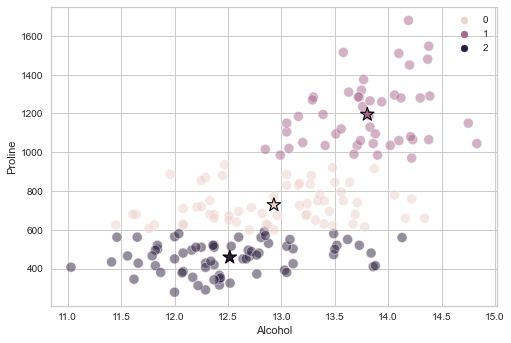

In [20]:
ax = sns.scatterplot(data= metadata, x='Alcohol', y='Proline', hue=kmeans.labels_, alpha=0.5, s=100)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 12],
                     hue=range(3), s=200,marker='*', ec='black', legend=False, ax=ax)

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


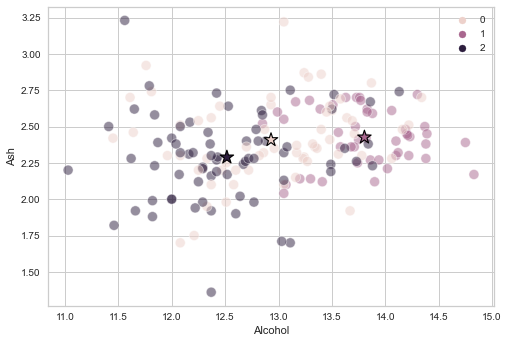

In [21]:
ax = sns.scatterplot(data= metadata, x='Alcohol', y='Ash', hue=kmeans.labels_, alpha=0.5, s=100)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
                     hue=range(3), s=200,marker='*', ec='black', legend=False, ax=ax)

In [22]:
def show_centers(x, y, centers, color, label):
    x_col = metadata.columns.get_loc(x.name)
    if y is None: # for the histograms
        plt.axvline(centers[label, x_col], color='r', ls=':')
    else:
        y_col = metadata.columns.get_loc(y.name)
        plt.scatter(centers[label, x_col], centers[label, y_col], marker='*', color='r', s=50)

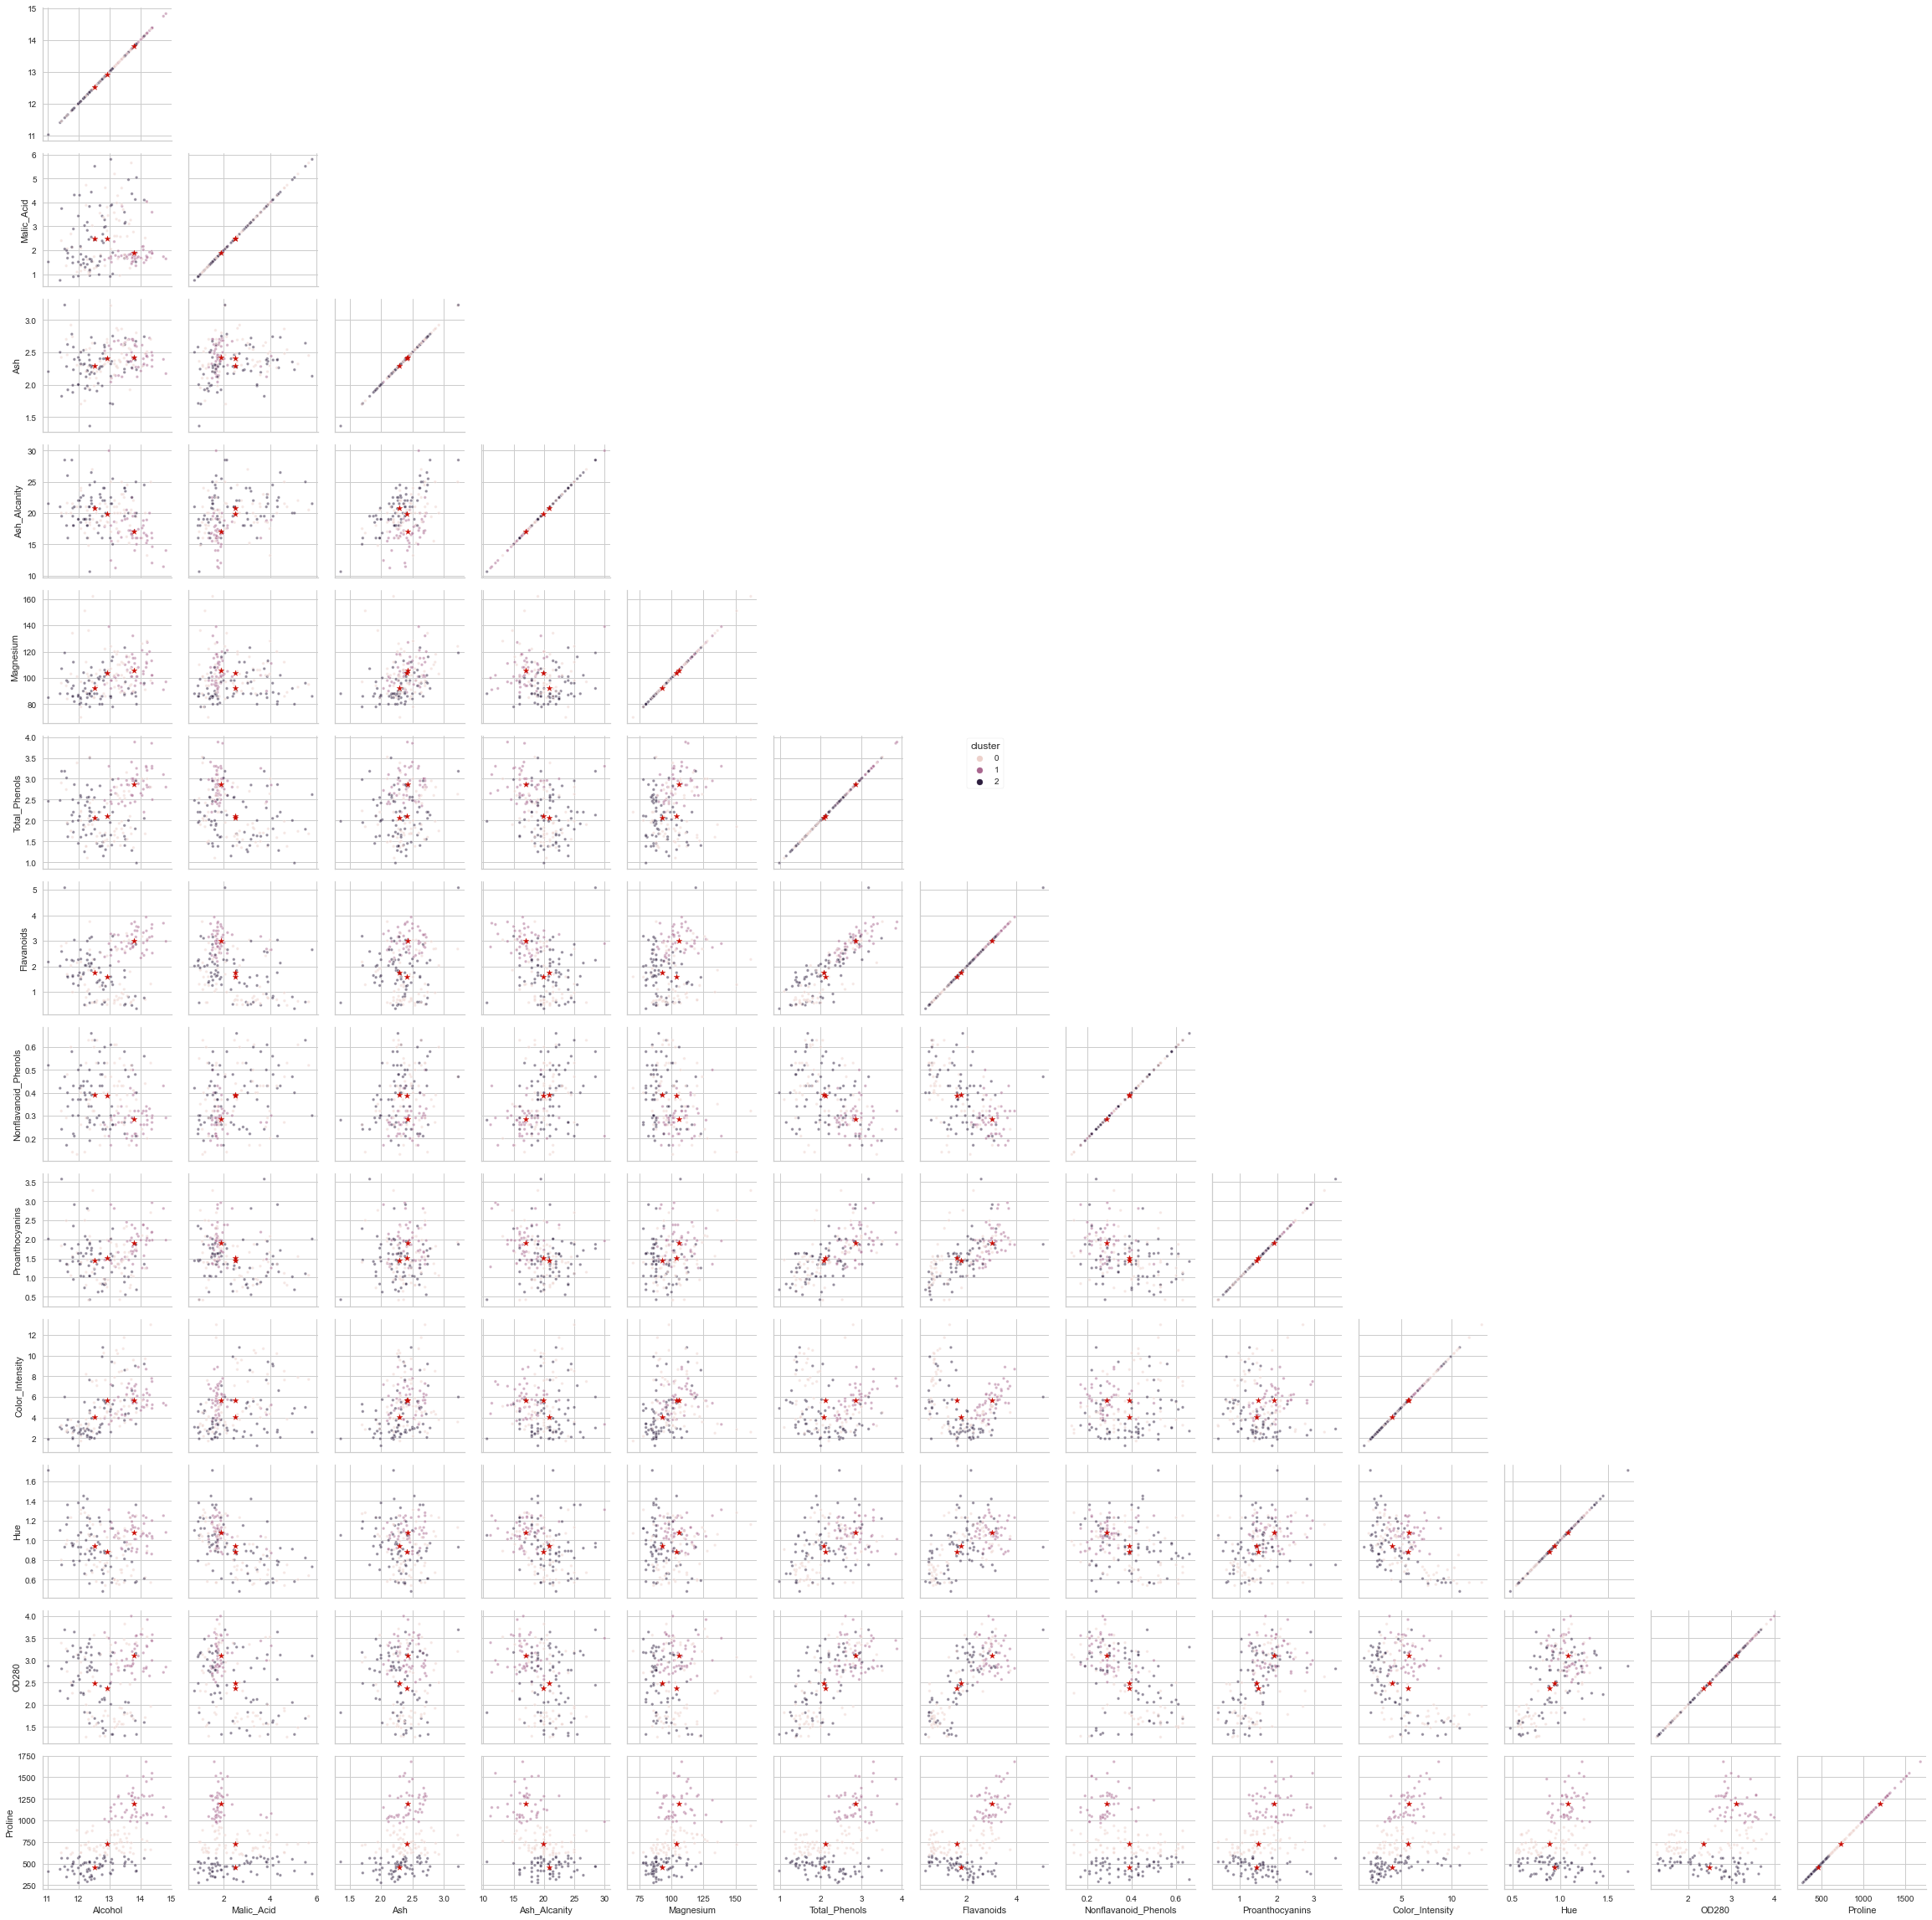

In [23]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, hue="cluster", corner=True)
g.map(sns.scatterplot, marker='.', alpha=0.5)
g.map(show_centers, centers=kmeans.cluster_centers_)
# g.map(sns.scatterplot(alpha=0.5))
# g.map(sns.scatterplot(data=kmeans.cluster_centers_, s=200,marker='*', ec='black', legend=False))
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

# 3. Hierarchical Clustering

In [24]:
hc=sch.linkage(metadata, metric='euclidean', method='ward')

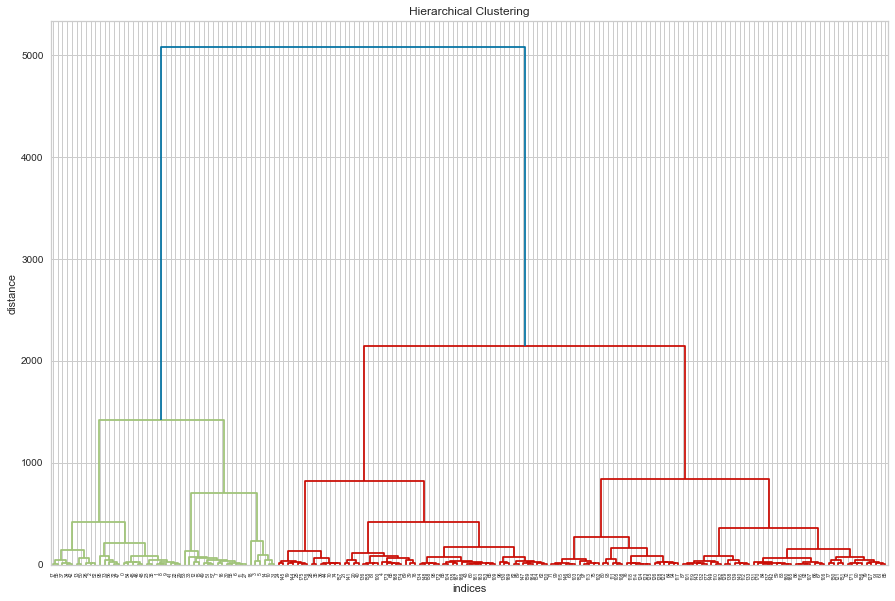

In [25]:
plt.figure(figsize = (15, 10))
sch.dendrogram(hc)
plt.title('Hierarchical Clustering')
plt.xlabel('indices')
plt.ylabel('distance')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1416.683338108347, 1416.683338108347, 0.0],
  [0.0, 2141.8849632509896, 2141.8849632509896, 0.0],
  [1416.683338108347,
   5078.327147402943,
   5078.327147402943,
   2141.8849632509896]],
 'ivl': ['(28)', '(20)', '(58)', '(72)'],
 'leaves': [347, 349, 350, 351],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

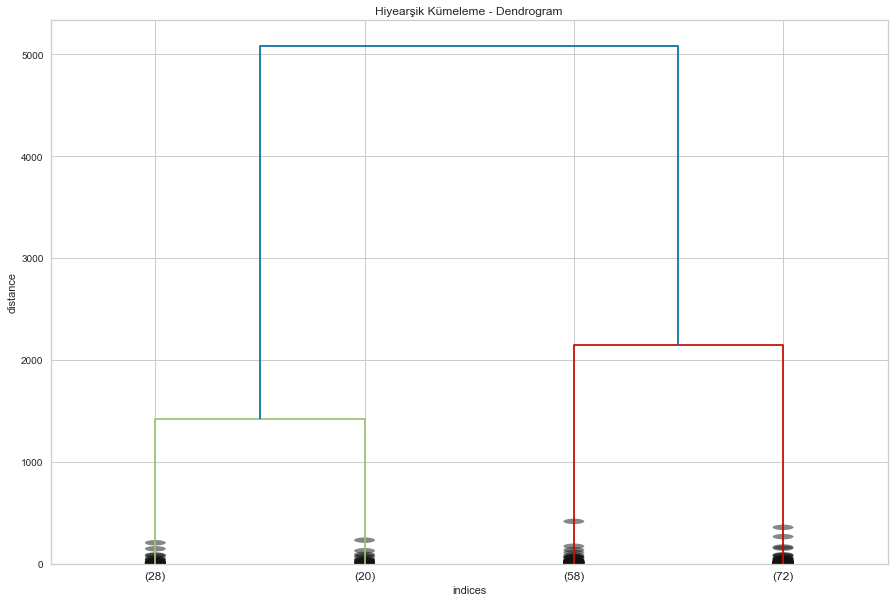

In [26]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
sch.dendrogram(hc,
          truncate_mode="lastp",
          p = 4,
          show_contracted=True)

In [27]:
hierarchical  = AgglomerativeClustering(n_clusters = 4,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(metadata)

In [28]:
dfff = metadata.copy()
dfff["Clusters for Hierarchical"] = hierarchical
dfff[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  Clusters for Hierarchical  
0   3.92     1065        1                          3  
1   3.40     1050        1                          3  
2   3.17     1185        1                          3  
3   3.45     1480        1                          1  
4   2.93      735        0                          2

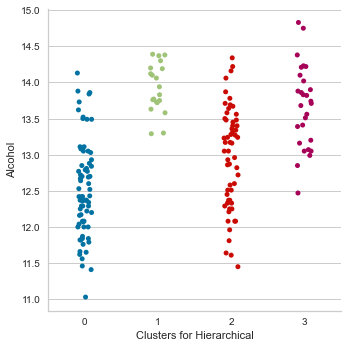

In [29]:
sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

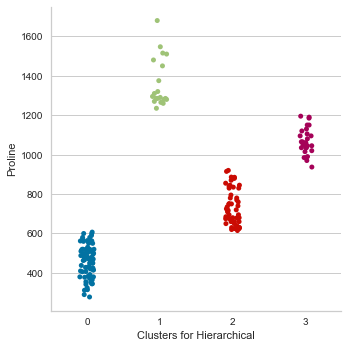

In [30]:
sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)

# KMedoids

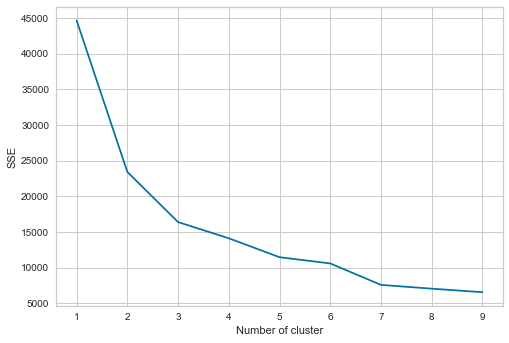

In [31]:
sse = {} 

# for k in range(1, 10):
#     kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(metadata)
#     sse[k] = kmedo.inertia_

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k).fit(metadata)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
#Train the Model
kmedoids = KMedoids(n_clusters=3).fit(metadata)
kmed=metadata.copy()
kmed['cluster'] = kmedoids.labels_

In [33]:
kmedoids.inertia_

16376.995508110507

In [34]:
kmedoids.cluster_centers_

array([[1.260e+01, 2.460e+00, 2.200e+00, 1.850e+01, 9.400e+01, 1.620e+00,
        6.600e-01, 6.300e-01, 9.400e-01, 7.100e+00, 7.300e-01, 1.580e+00,
        6.950e+02, 0.000e+00],
       [1.349e+01, 1.660e+00, 2.240e+00, 2.400e+01, 8.700e+01, 1.880e+00,
        1.840e+00, 2.700e-01, 1.030e+00, 3.740e+00, 9.800e-01, 2.780e+00,
        4.720e+02, 2.000e+00],
       [1.383e+01, 1.570e+00, 2.620e+00, 2.000e+01, 1.150e+02, 2.950e+00,
        3.400e+00, 4.000e-01, 1.720e+00, 6.600e+00, 1.130e+00, 2.570e+00,
        1.130e+03, 1.000e+00]])

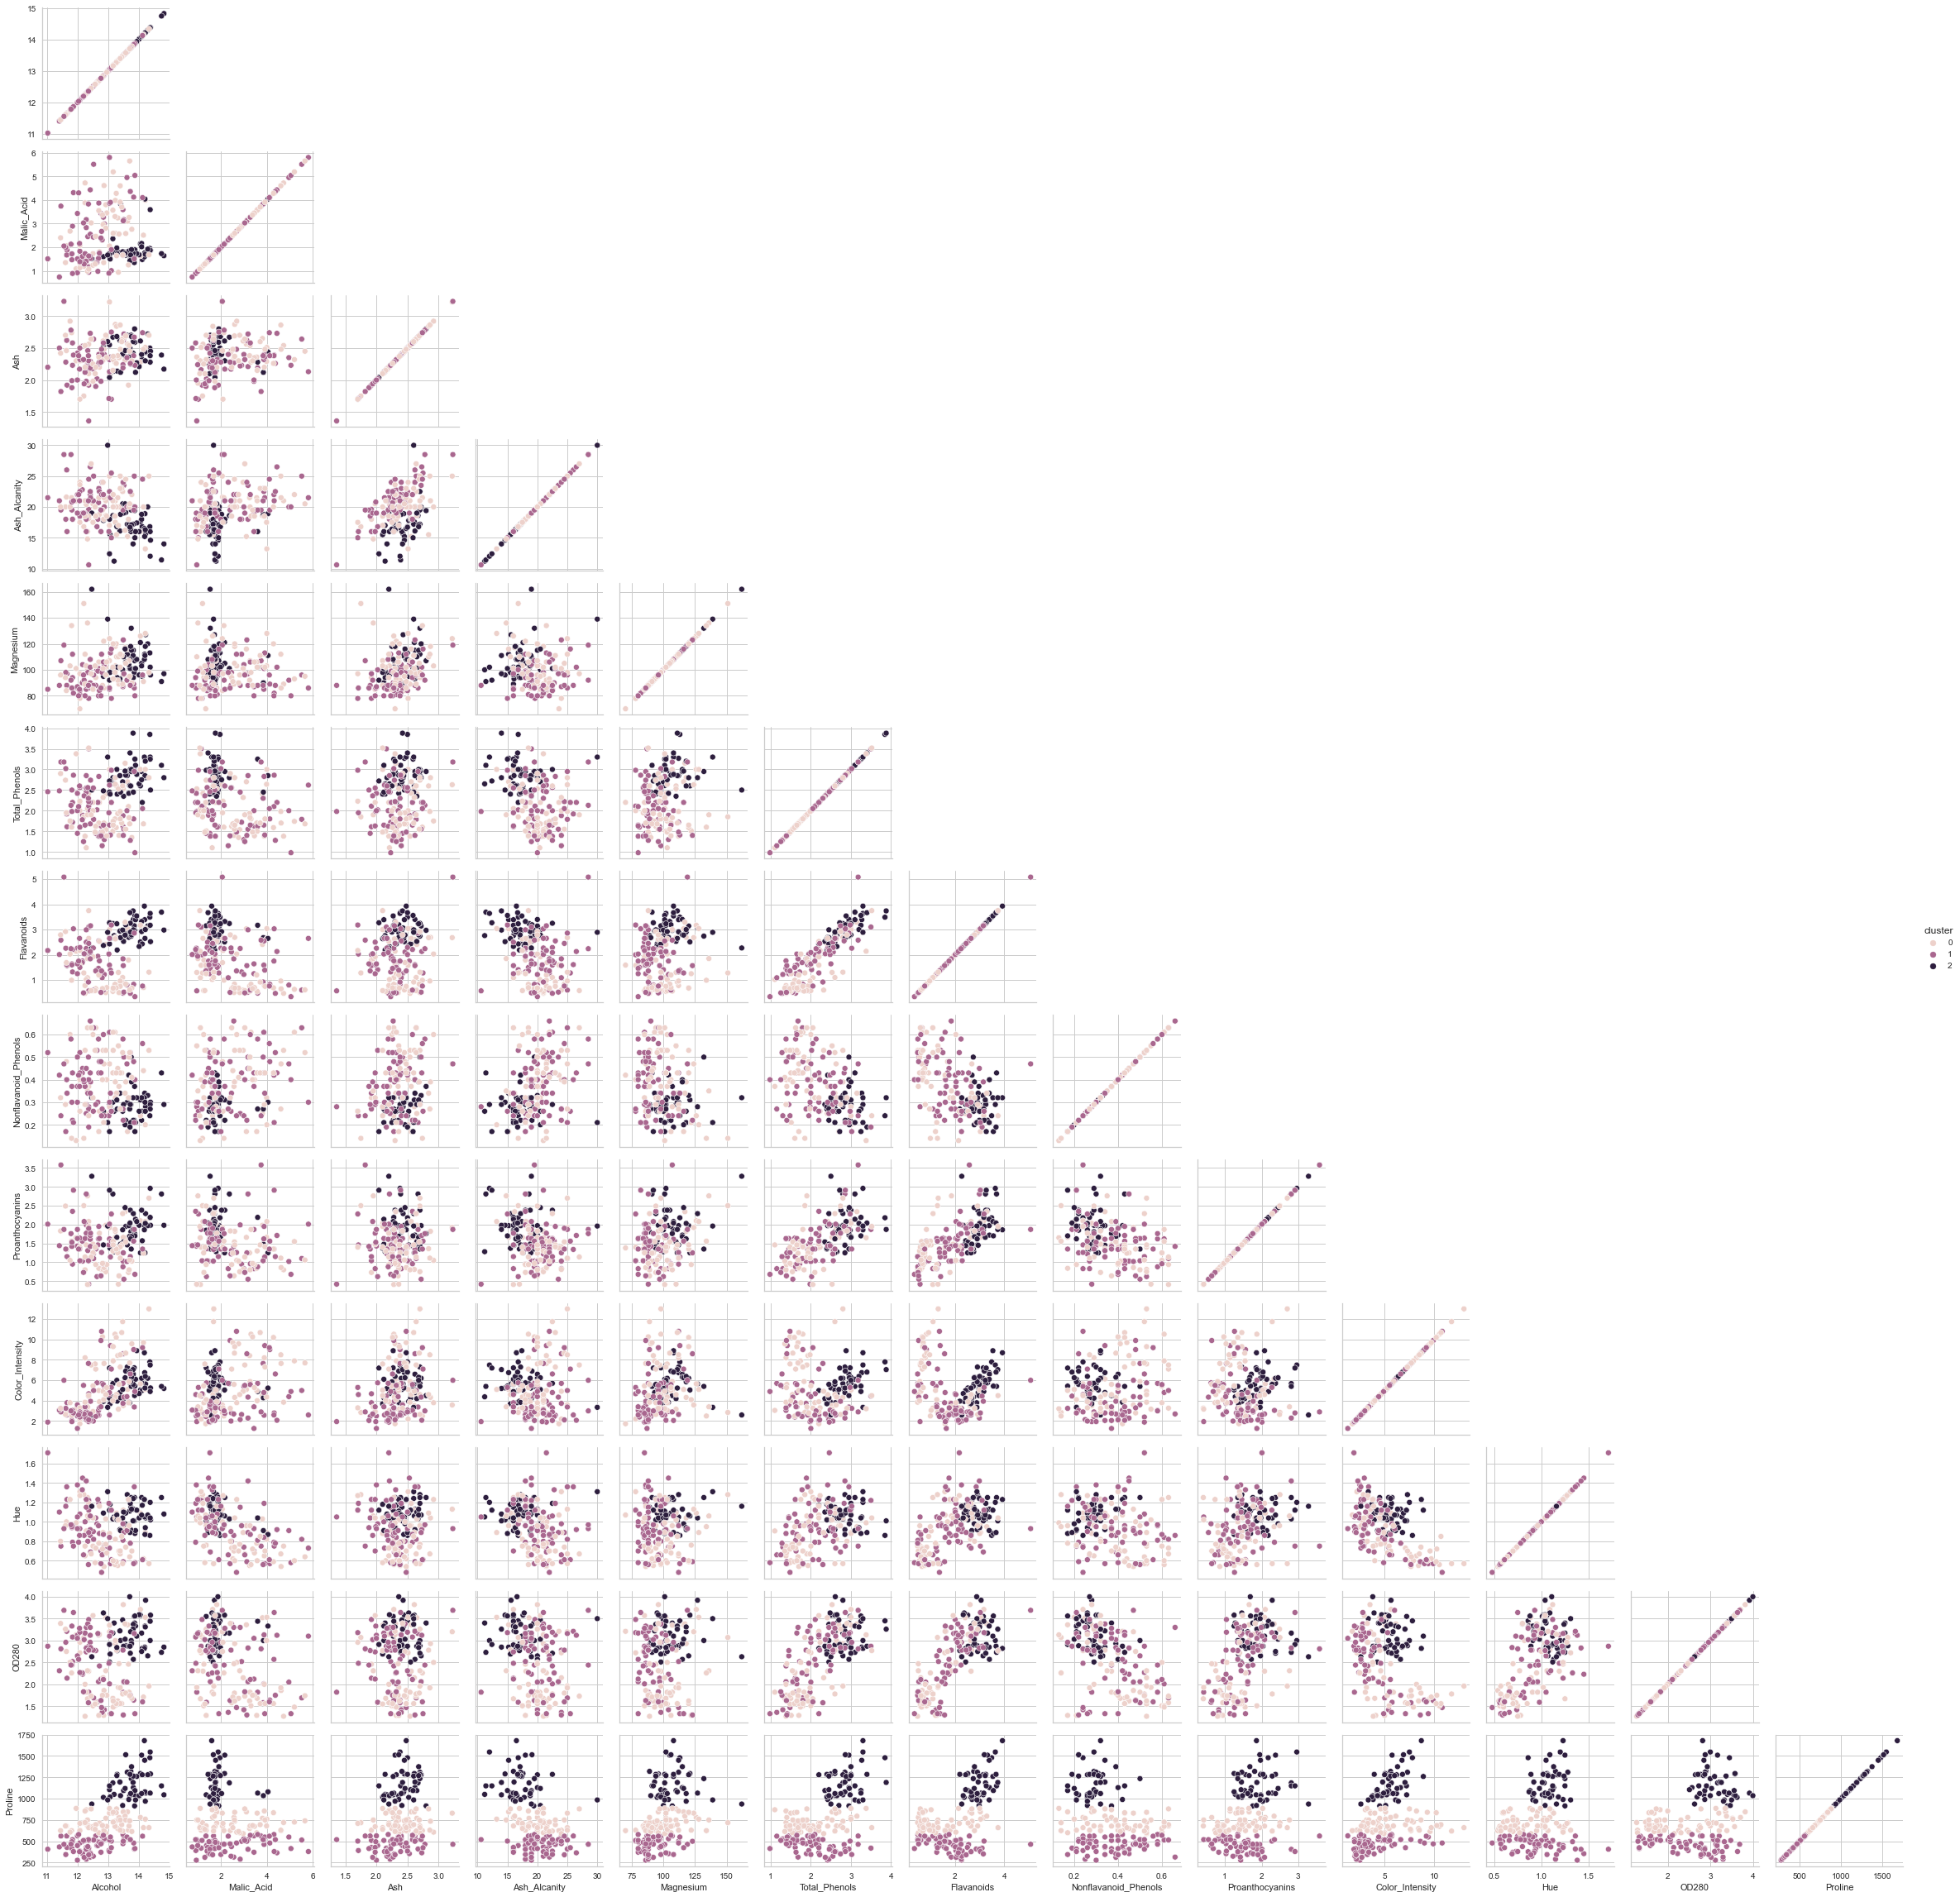

In [35]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(kmed, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

# DBSCAN

In [36]:
neighbors = 6
# X_embedded is your data
ns=neighbors
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(metadata)
distances, indices = nbrs.kneighbors(metadata)
distance_desc = sorted(distances[:,ns-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [37]:
dbscan=DBSCAN(eps=20, min_samples=6).fit(metadata)
dbscan.labels_

array([-1,  0, -1, -1, -1, -1,  1,  1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1,
       -1, -1,  5, -1,  0, -1, -1,  0, -1,  2,  5, -1,  0, -1,  0,  1, -1,
        1, -1, -1,  0, -1, -1,  1,  1,  3,  2,  3,  4,  3, -1,  2,  3,  3,
       -1, -1,  5,  3,  3, -1,  5,  3,  3,  3, -1,  3, -1, -1,  4,  3,  3,
        3,  3,  6,  2,  4,  3,  3,  3, -1, -1, -1, -1,  3,  2,  3,  2,  6,
        3,  3,  2, -1,  3,  3, -1,  2,  6, -1,  4,  3,  3,  3,  3, -1,  3,
        6,  4,  3, -1,  3,  3,  3, -1,  3, -1,  6, -1,  3,  6,  4,  2,  2,
       -1,  3,  6,  4,  4, -1,  3,  6,  5, -1,  3,  4,  2,  6, -1, -1, -1,
        2,  2, -1,  3,  5,  2,  4,  3,  2,  6,  2,  4,  3,  2,  2, -1,  4,
        3,  3,  2, -1, -1, -1, -1,  6], dtype=int64)

In [38]:
result=metadata.copy()
result['cluster']=dbscan.labels_
result

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065       -1  
1     3.40     1050        0  
2     3.17     1185       -1  
3     3.45     1480       -1  
4     2.93      735       -1  
..     ...      ...      ...  
173   1.74      740       -1  
174   1.56      750       -1  
175   1.56      835       -1  
176   1.62      840       -1  
177   1.60      560        6  

[178 rows x 14 columns]

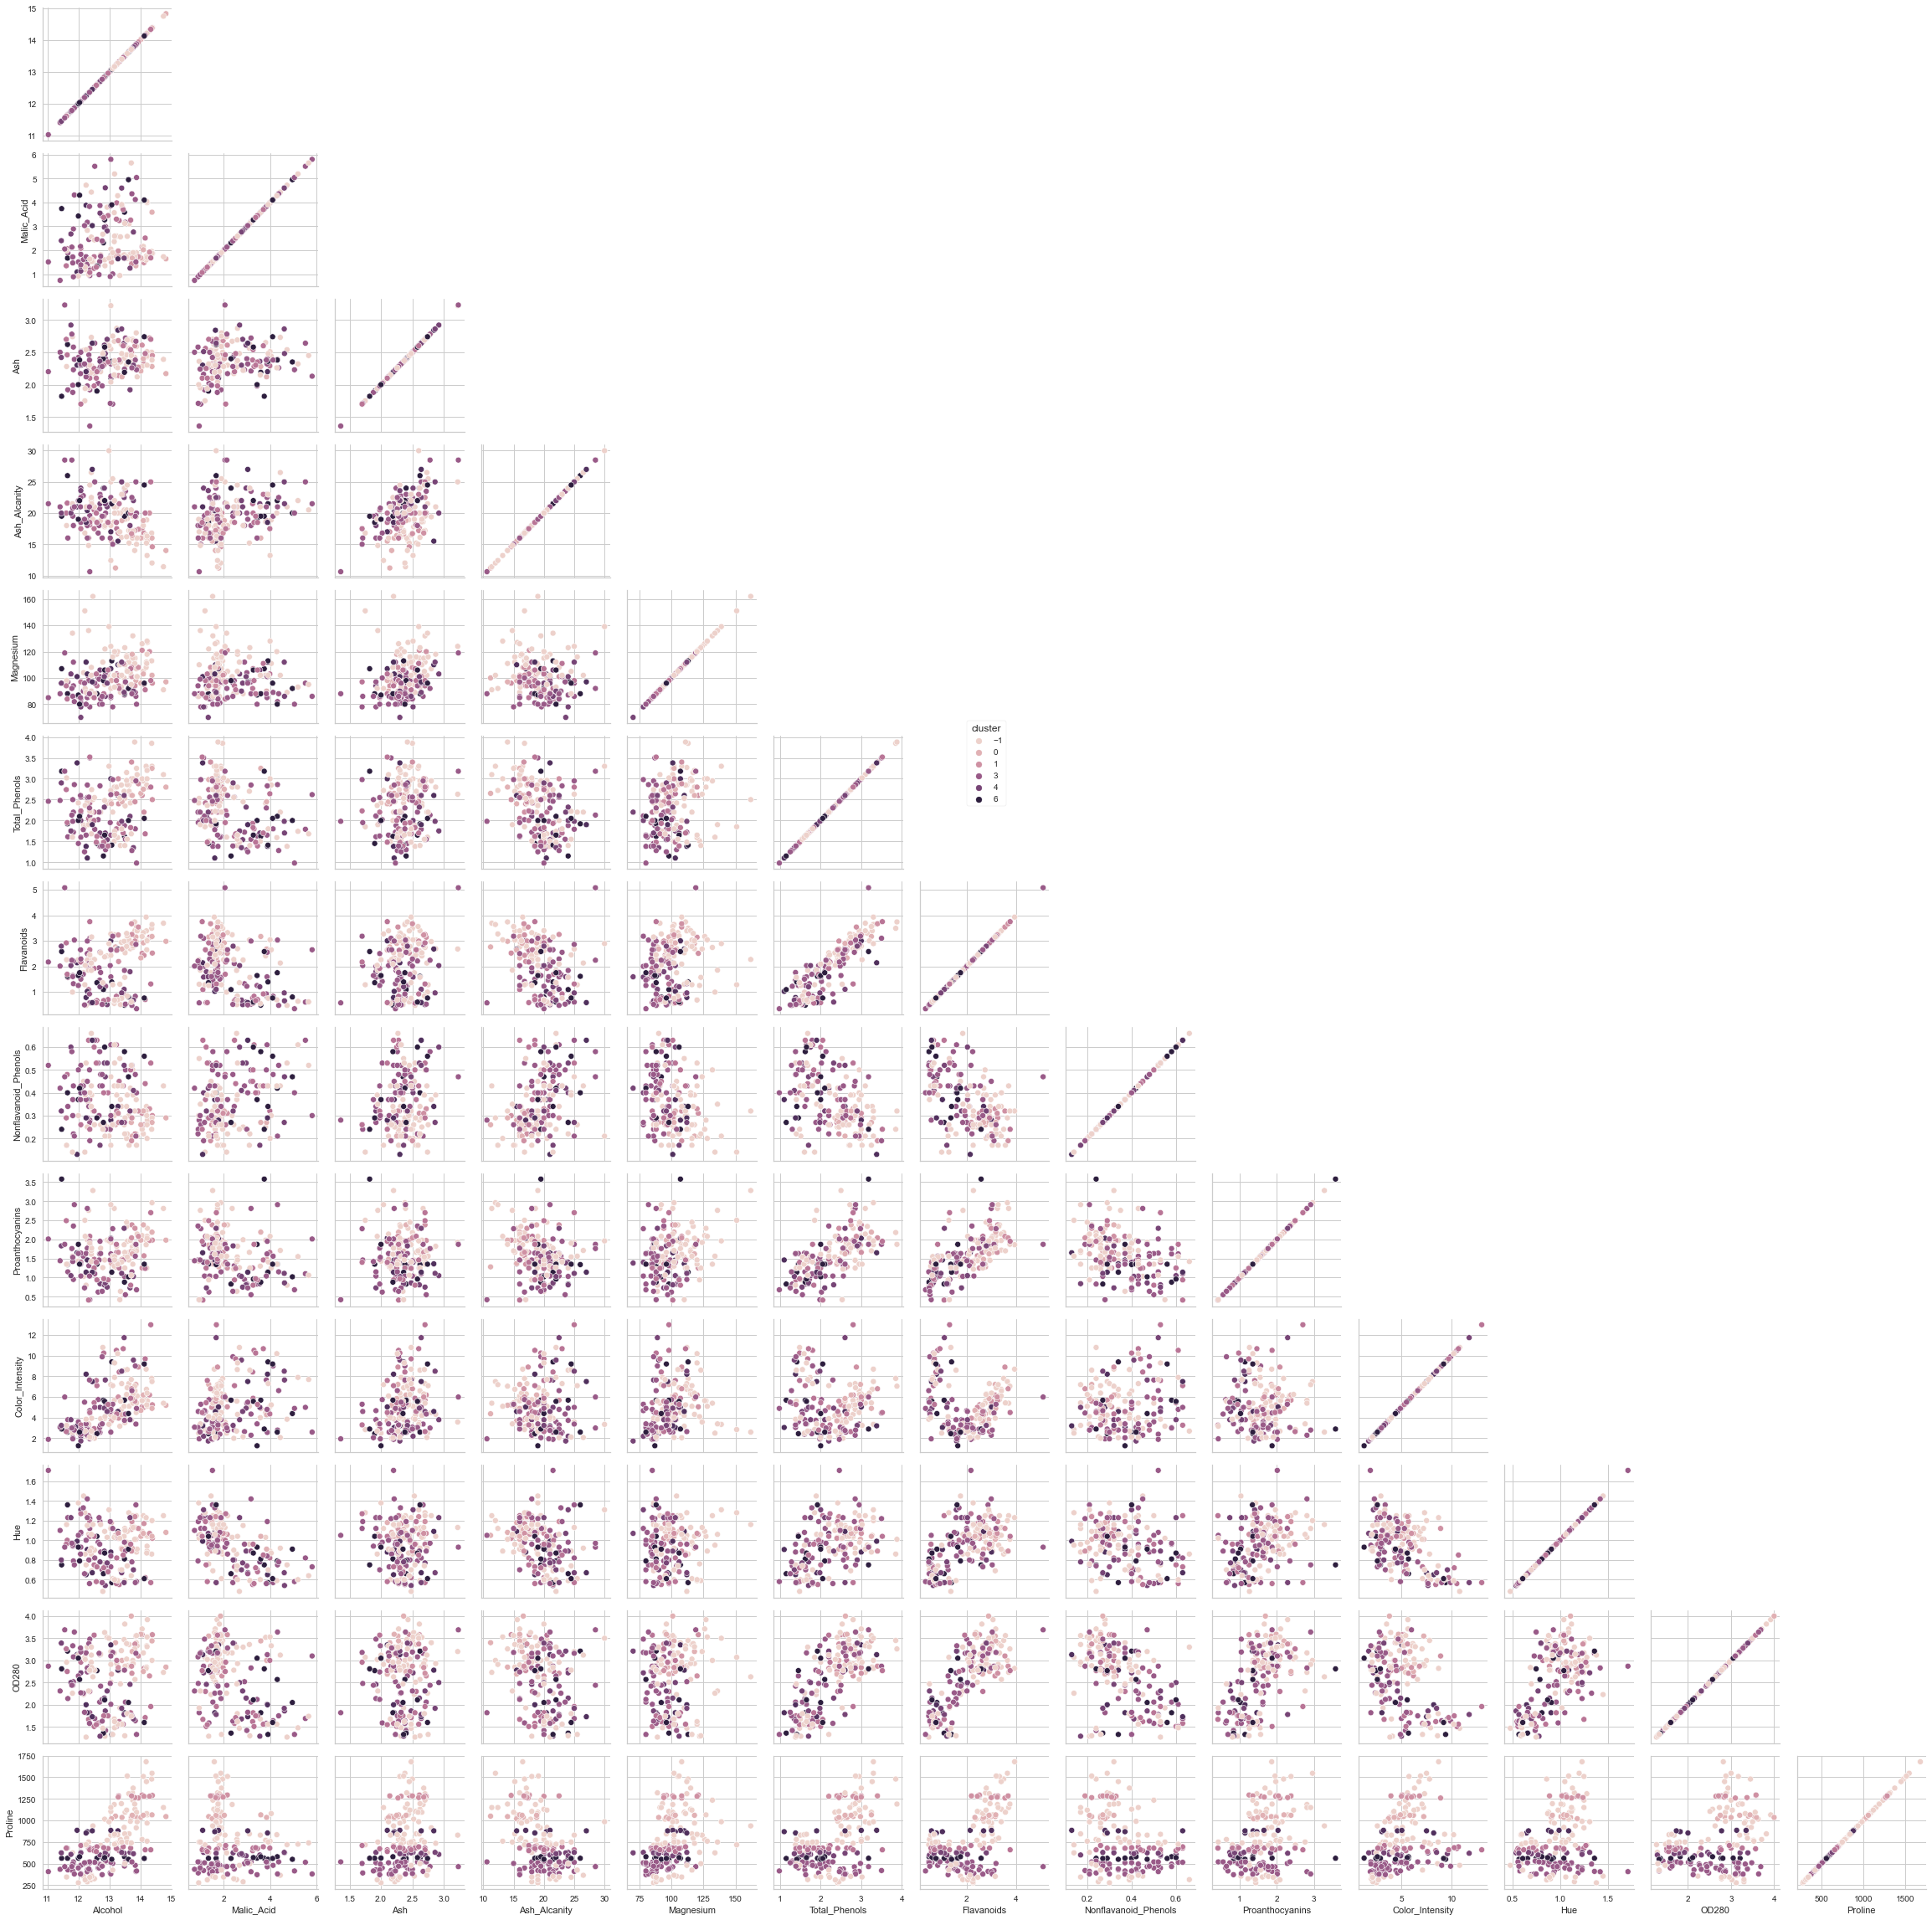

In [39]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(result, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

In [40]:
result1=result.copy()
result1.drop(result1.loc[result1['cluster']==-1].index, inplace=True)
result1.sort_values(by='cluster')

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
48     14.10        2.02  2.40          18.8        103           2.75   
46     14.38        3.59  2.28          16.0        102           3.25   
54     13.74        1.67  2.25          16.4        118           2.60   
41     13.41        3.84  2.12          18.8         90           2.45   
..       ...         ...   ...           ...        ...            ...   
138    13.49        3.59  2.19          19.5         88           1.62   
87     11.65        1.67  2.62          26.0         88           1.92   
132    12.81        2.31  2.40          24.0         98           1.15   
101    12.60        1.34  1.90          18.5         88           1.45   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
48         2.92                  0.32             2.38             6.20  1.07   
46         3.17                  0.27             2.19             4.90  1.04   
54         2.90                  0.21             1.62             5.85  0.92   
41         2.68                  0.27             1.48             4.28  0.91   
..          ...                   ...              ...              ...   ...   
138        0.48                  0.58             0.88             5.70  0.81   
87         1.61                  0.40             1.34             2.60  1.36   
132        1.09                  0.27             0.83             5.70  0.66   
101        1.36                  0.29             1.35             2.45  1.04   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
1     3.40     1050        0  
48    2.75     1060        0  
46    3.44     1065        0  
54    3.20     1060        0  
41    3.00     1035        0  
..     ...      ...      ...  
138   1.82      580        6  
87    3.21      562        6  
132   1.36      560        6  
101   2.77      562        6  
177   1.60      560        6  

[111 rows x 14 columns]

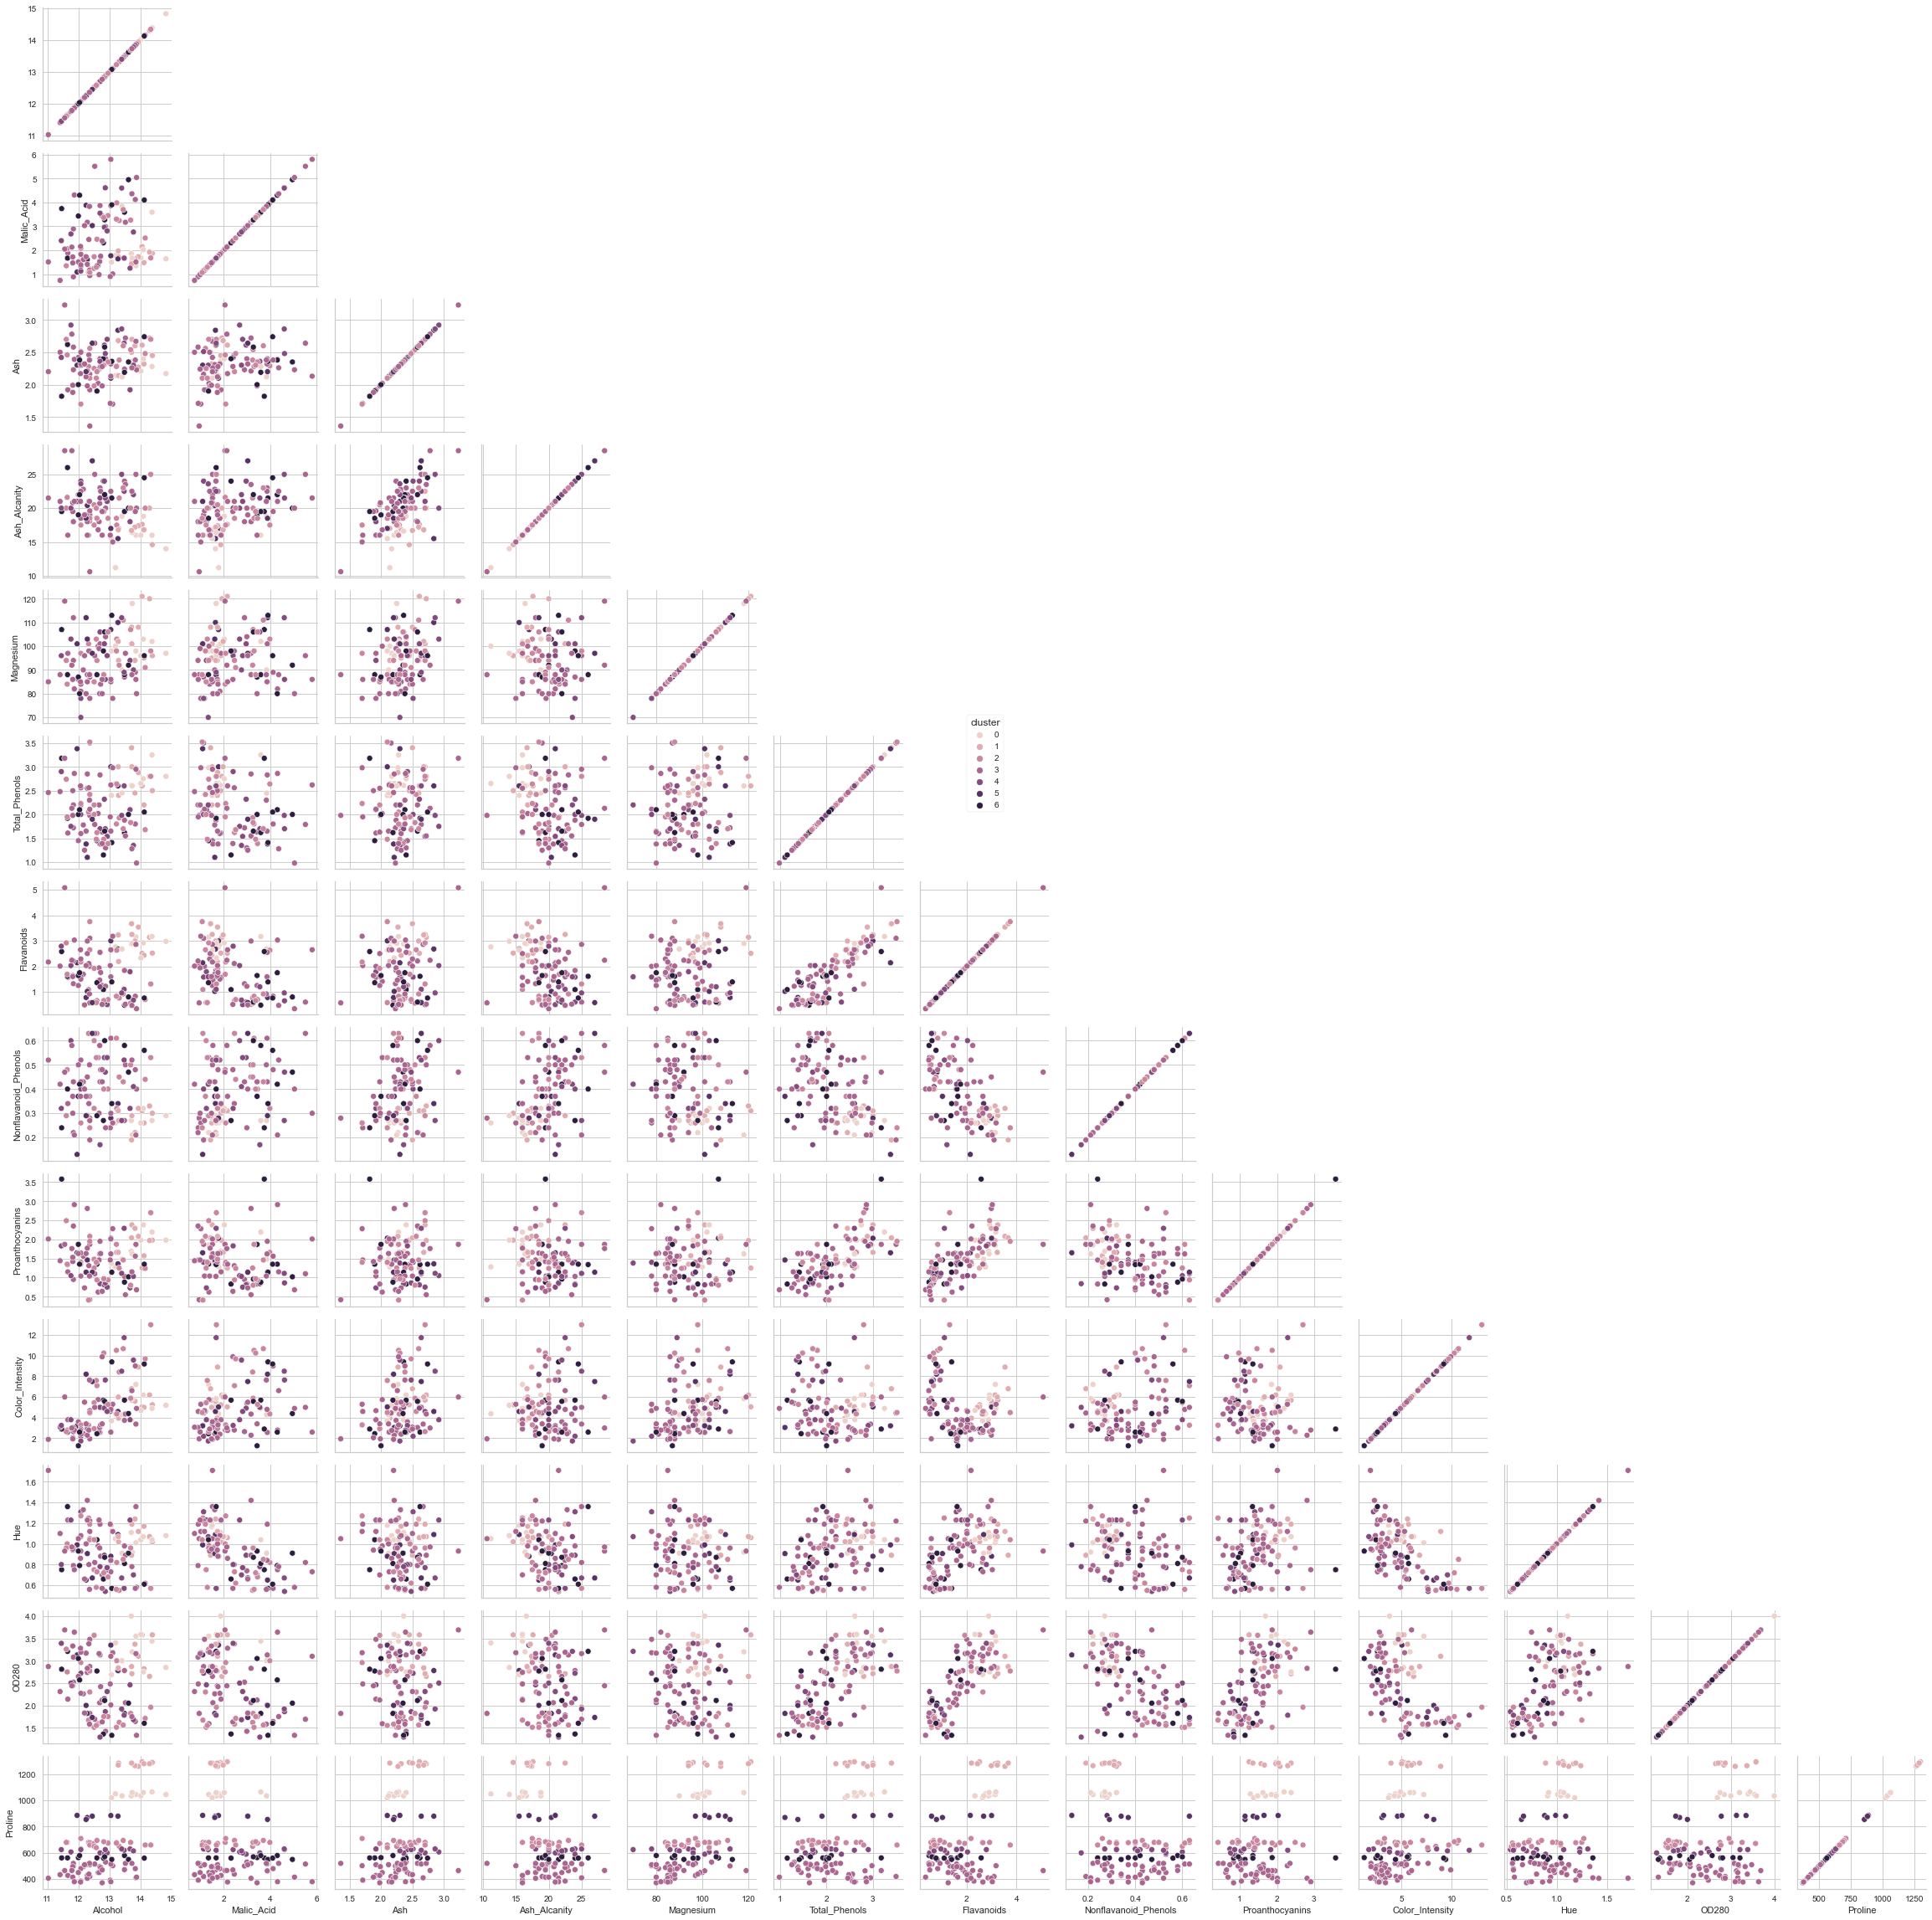

In [41]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(result1, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')